In [1]:
import pandas as pd

In [2]:
datos = pd.read_json("/content/TelecomX_Data.json")


In [3]:
print("Columnas del dataset y sus tipos:\n")


Columnas del dataset y sus tipos:



In [4]:
print(datos.dtypes)


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [7]:
print("Valores nulos por columna:\n")
print(datos.isnull().sum())


Valores nulos por columna:

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [10]:
from pandas import json_normalize


In [11]:
datos = json_normalize(datos.to_dict(orient="records"))


In [12]:
print(datos.dtypes)


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [14]:
print(datos.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [15]:
datos["Cuentas_Diarias"] = datos["account.Charges.Monthly"] / 30


Ajuste para crear Cuentas_Diarias

Si por ejemplo aparece como account.Charges.Monthly, entonces:

# Usar el nombre real de la columna
datos["Cuentas_Diarias"] = datos["account.Charges.Monthly"] / 30

# Verificar
print(datos[["account.Charges.Monthly", "Cuentas_Diarias"]].head())


In [16]:
print(datos[["account.Charges.Monthly", "Cuentas_Diarias"]].head())


   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [17]:
# Quitar prefijos de los nombres de columnas
datos.columns = datos.columns.str.replace('customer.', '', regex=False)
datos.columns = datos.columns.str.replace('phone.', '', regex=False)
datos.columns = datos.columns.str.replace('internet.', '', regex=False)
datos.columns = datos.columns.str.replace('account.', '', regex=False)

# Verificar columnas después del cambio
print(datos.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


In [19]:
datos["Cuentas_Diarias"] = datos["Charges.Monthly"] / 30
print(datos[["Charges.Monthly", "Cuentas_Diarias"]].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [21]:
# 1. Convertir Sí/No a binario
cols_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

for col in cols_binarias:
    if col in datos.columns:
        datos[col] = datos[col].replace({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0})


/tmp/ipython-input-2651301465.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[col] = datos[col].replace({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0})


# 2. Unificar valores de servicio inexistente a 0
valores_no_servicio = ['No internet service', 'No phone service']
for col in datos.columns:
    if datos[col].dtype == 'object':
        datos[col] = datos[col].replace(valores_no_servicio, 'No')

In [22]:
valores_no_servicio = ['No internet service', 'No phone service']
for col in datos.columns:
    if datos[col].dtype == 'object':
        datos[col] = datos[col].replace(valores_no_servicio, 'No')

# 3. Traducir/renombrar columnas clave
renombres = {
    'tenure': 'Meses_Contrato',
    'Charges.Monthly': 'Factura_Mensual',
    'Charges.Total': 'Factura_Total',
    'Cuentas_Diarias': 'Factura_Diaria'
}
datos.rename(columns=renombres, inplace=True)

In [23]:
# 3. Traducir/renombrar columnas clave
renombres = {
    'tenure': 'Meses_Contrato',
    'Charges.Monthly': 'Factura_Mensual',
    'Charges.Total': 'Factura_Total',
    'Cuentas_Diarias': 'Factura_Diaria'
}
datos.rename(columns=renombres, inplace=True)

In [24]:
print(datos.head())


   customerID Churn  gender  SeniorCitizen  Partner  Dependents  \
0  0002-ORFBO     0  Female              0        1           1   
1  0003-MKNFE     0    Male              0        0           0   
2  0004-TLHLJ     1    Male              0        0           0   
3  0011-IGKFF     1    Male              1        1           0   
4  0013-EXCHZ     1  Female              1        1           0   

   Meses_Contrato  PhoneService MultipleLines InternetService  ...  \
0               9             1             0             DSL  ...   
1               9             1             1             DSL  ...   
2               4             1             0     Fiber optic  ...   
3              13             1             0     Fiber optic  ...   
4               3             1             0     Fiber optic  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           1           1               0        One year   
1                0  

# Ajustar Pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Mostrar las primeras filas
datos.head(10)


1.   Elemento de lista
2.   Elemento de lista



In [25]:
# Ajustar Pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Mostrar las primeras filas
datos.head(10)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,Meses_Contrato,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,0,0,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,1,1,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,1,0,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.8,2.821667
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,1,1,1,1,1,1,Two year,1,Mailed check,90.45,5957.9,3.015000


#Análisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.


In [26]:
import pandas as pd


In [27]:
# Ajustes para ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 1. Estadísticas descriptivas generales (numéricas)
estadisticas_numericas = datos.describe().T  # Transpuesta para mejor lectura
print("\n📊 Estadísticas Numéricas:")
display(estadisticas_numericas)


In [28]:
# 1. Estadísticas descriptivas generales (numéricas)
estadisticas_numericas = datos.describe().T  # Transpuesta para mejor lectura
print("\n📊 Estadísticas Numéricas:")
display(estadisticas_numericas)


📊 Estadísticas Numéricas:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
Meses_Contrato,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling,7267.0,0.593230,0.491265,0.000000,0.000000,1.000000,1.000000,1.000000
Factura_Mensual,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Factura_Diaria,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


# 2. Mediana de cada variable numérica
medianas = datos.median(numeric_only=True)
print("\n📍 Medianas:")
display(medianas)


In [29]:
# 2. Mediana de cada variable numérica
medianas = datos.median(numeric_only=True)
print("\n📍 Medianas:")
display(medianas)


📍 Medianas:


,0
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
Meses_Contrato,29.000000
PhoneService,1.000000
PaperlessBilling,1.000000
Factura_Mensual,70.300000
Factura_Diaria,2.343333


# 3. Estadísticas para variables categóricas
estadisticas_categoricas = datos.describe(include='object').T
print("\n🔠 Estadísticas Categóricas:")
display(estadisticas_categoricas)


In [30]:
# 3. Estadísticas para variables categóricas
estadisticas_categoricas = datos.describe(include='object').T
print("\n🔠 Estadísticas Categóricas:")
display(estadisticas_categoricas)


🔠 Estadísticas Categóricas:


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,0,5174
gender,7267,2,Male,3675
MultipleLines,7267,3,0,3495
InternetService,7267,3,Fiber optic,3198
OnlineSecurity,7267,3,0,3608
OnlineBackup,7267,3,0,3182
DeviceProtection,7267,3,0,3195
TechSupport,7267,3,0,3582
StreamingTV,7267,3,0,2896


# 4. Distribución de la variable objetivo Churn
churn_counts = datos['Churn'].value_counts(normalize=True) * 100
print("\n📈 Distribución de Churn (%):")
display(churn_counts)


In [31]:
# 4. Distribución de la variable objetivo Churn
churn_counts = datos['Churn'].value_counts(normalize=True) * 100
print("\n📈 Distribución de Churn (%):")
display(churn_counts)



📈 Distribución de Churn (%):


,proportion
Churn,
0,71.198569
1,25.719004
,3.082427


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.
import matplotlib.pyplot as plt

import seaborn as sns

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de la variable "Churn"
plt.figure(figsize=(6, 4))
sns.countplot(data=datos, x='Churn', palette='Set2')

/tmp/ipython-input-863829138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='Churn', palette='Set2')


<Axes: xlabel='Churn', ylabel='count'>

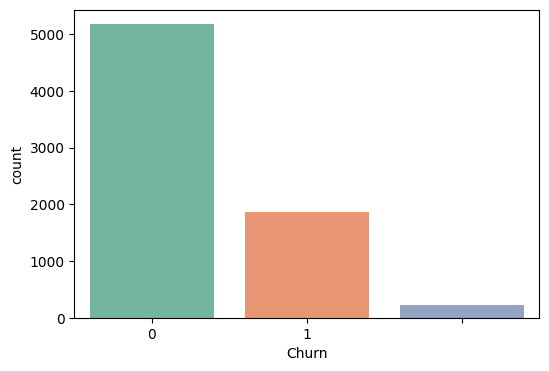

In [33]:
# Visualización de la distribución de la variable "Churn"
plt.figure(figsize=(6, 4))
sns.countplot(data=datos, x='Churn', palette='Set2')


# Títulos y etiquetas
plt.title('Distribución de Churn (Evasión de Clientes)', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

Text(0, 0.5, 'Cantidad de Clientes')

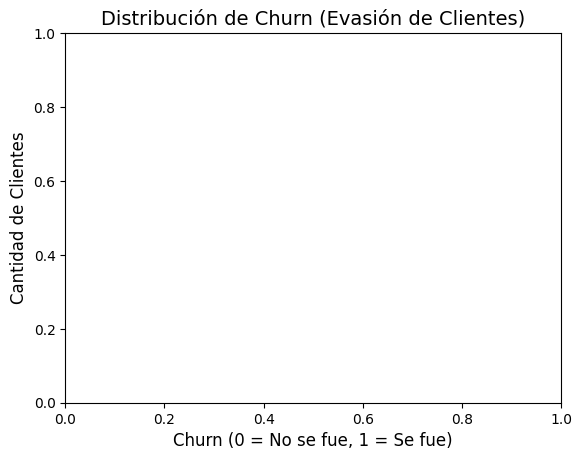

In [34]:

# Títulos y etiquetas
plt.title('Distribución de Churn (Evasión de Clientes)', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

In [36]:
# Mostrar el gráfico
plt.show()

#Recuento de evasión por variables categóricas
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

# Listado de columnas categóricas relevantes
columnas_categoricas = [
    'gender', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Crear gráficos de barras para cada variable categórica vs Churn
plt.figure(figsize=(16, 16))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas de gráficos
    sns.countplot(data=datos, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribución de Churn según {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Cantidad de Clientes', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()


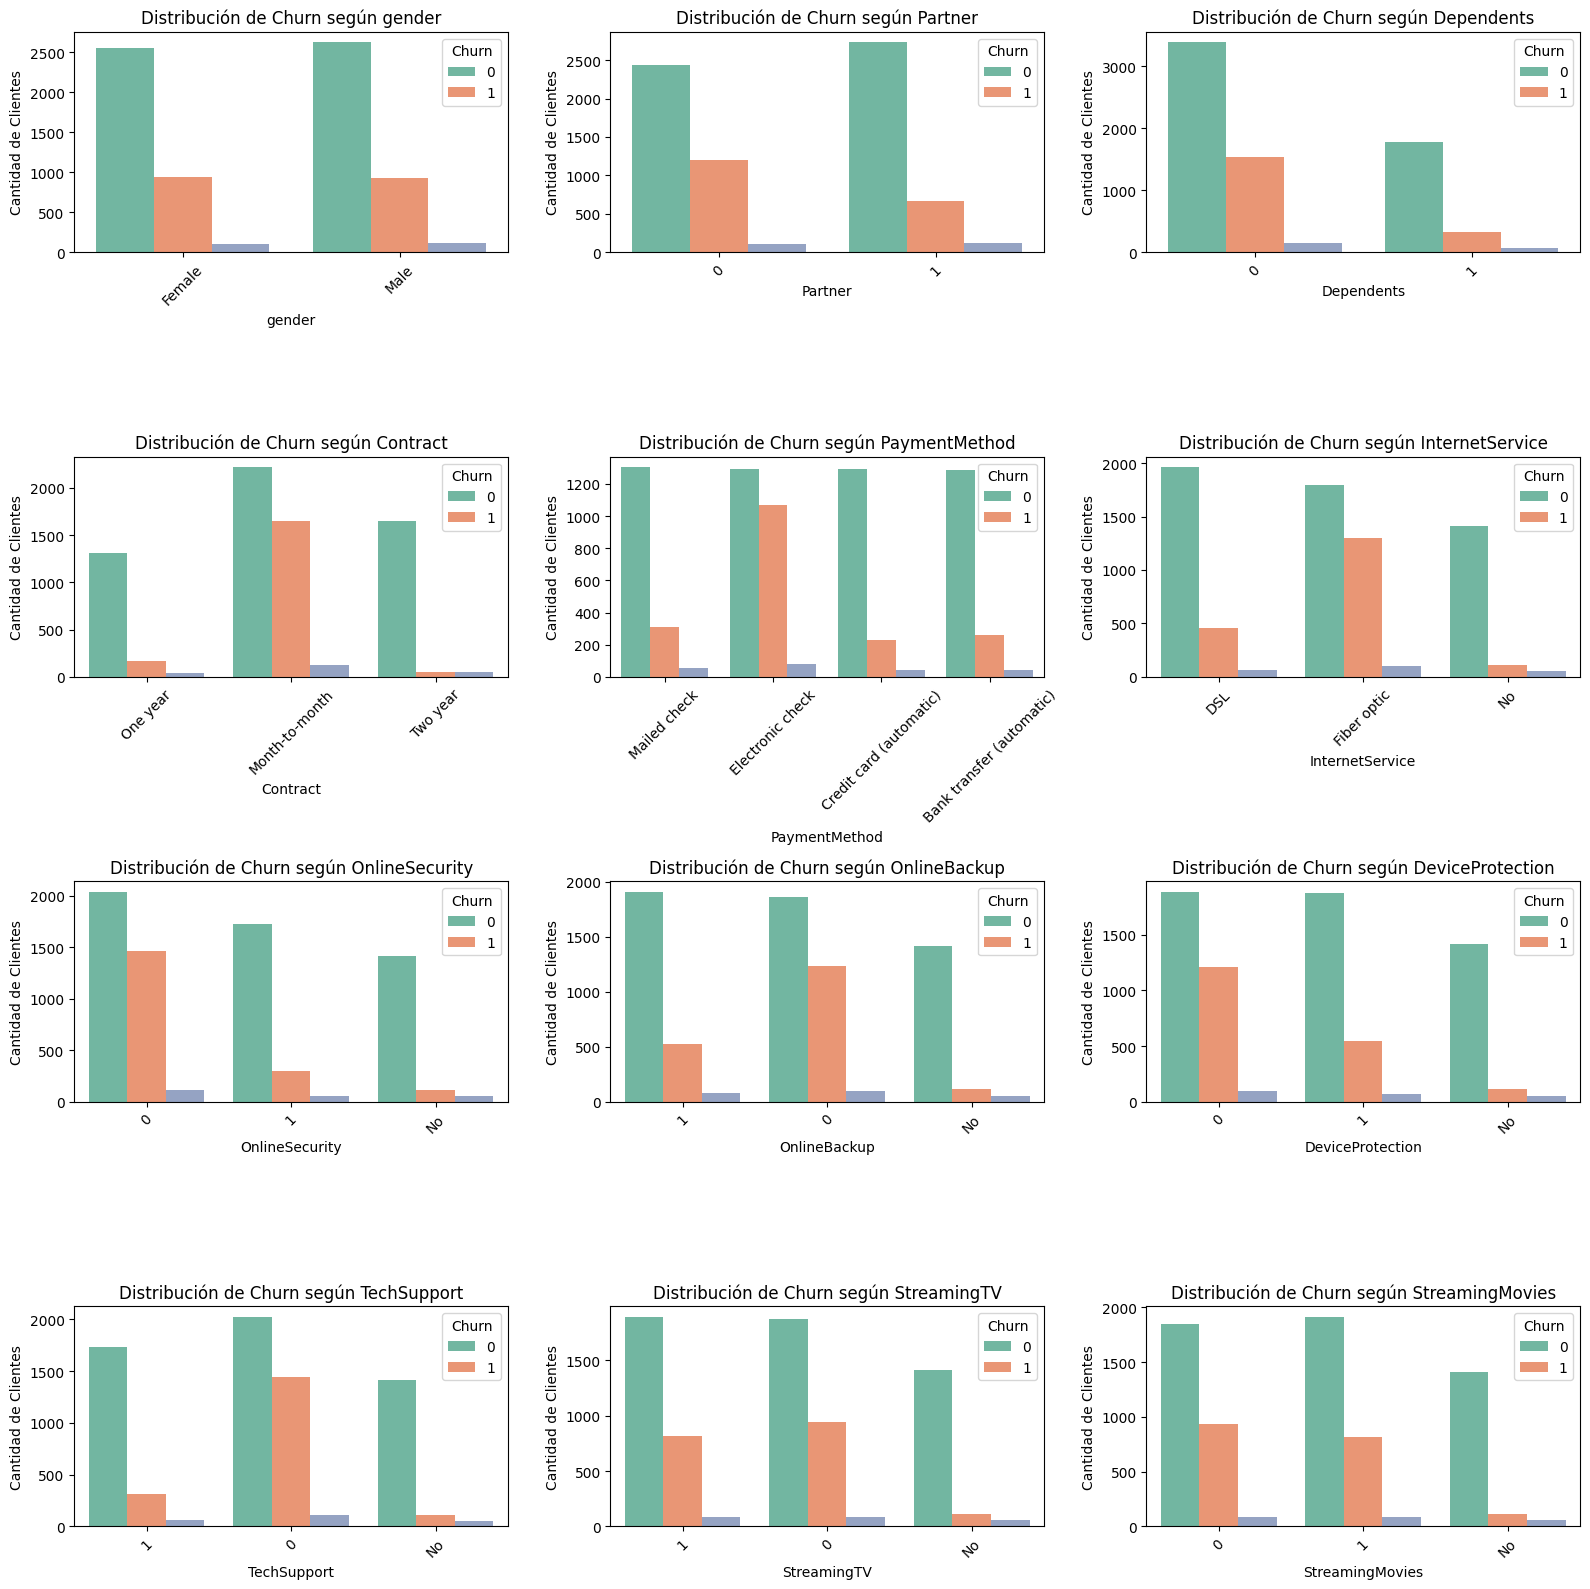

In [37]:
# Listado de columnas categóricas relevantes
columnas_categoricas = [
    'gender', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Crear gráficos de barras para cada variable categórica vs Churn
plt.figure(figsize=(16, 16))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas de gráficos
    sns.countplot(data=datos, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribución de Churn según {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Cantidad de Clientes', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()


Observaciones posibles:

Contract:

Los clientes con contrato mensual (Month-to-month) tienen una mayor evasión (Churn = 1), lo que es esperado ya que es más fácil para ellos cancelar sin penalización.

Los clientes con contratos a largo plazo (1 o 2 años) tienden a permanecer más tiempo.

PaymentMethod:

Los clientes que pagan mediante cheques electrónicos (Electronic check) parecen tener una mayor tasa de evasión, lo que puede indicar que este método de pago es asociado a clientes menos comprometidos o que no tienen un método de pago más automático (como tarjeta de crédito o transferencia bancaria).

InternetService:

Los clientes con Internet DSL o Fiber optic tienen una mayor probabilidad de quedarse (Churn = 0).

Los clientes con sin servicio de Internet (No) tienen mayor evasión, lo que sugiere que los clientes sin acceso a Internet pueden estar más propensos a cancelar.

OnlineSecurity, OnlineBackup, DeviceProtection:

Los clientes que no tienen estos servicios adicionales (como protección en línea o respaldo) parecen ser más propensos a irse.

Esto sugiere que estos servicios adicionales podrían estar relacionados con la fidelización de los clientes.

#Conteo de evasión por variables numéricas
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

#Código en Colab para visualizar la distribución de variables numéricas entre Churn = 0 y Churn = 1

# Tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico de boxplot para "Factura_Total" (Total gastado) vs "Churn"
plt.subplot(1, 2, 1)
sns.boxplot(data=datos, x='Churn', y='Factura_Total', palette='Set2')
plt.title('Distribución de Factura Total según Churn', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Factura Total', fontsize=12)

/tmp/ipython-input-3309097871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='Churn', y='Factura_Total', palette='Set2')


Text(0, 0.5, 'Factura Total')

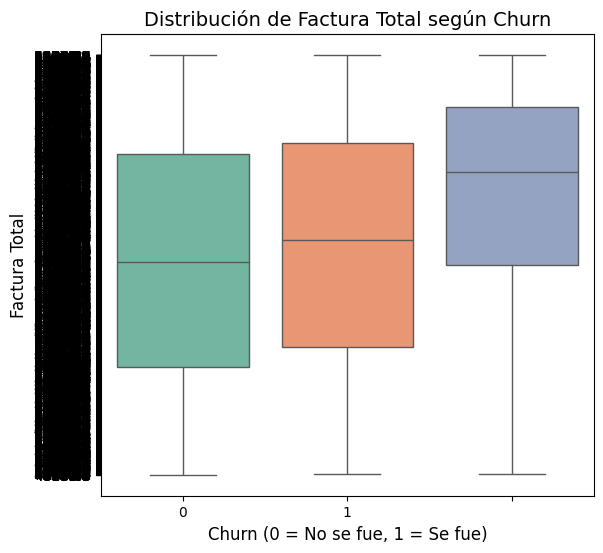

In [39]:
# Tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico de boxplot para "Factura_Total" (Total gastado) vs "Churn"
plt.subplot(1, 2, 1)
sns.boxplot(data=datos, x='Churn', y='Factura_Total', palette='Set2')
plt.title('Distribución de Factura Total según Churn', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Factura Total', fontsize=12)

# Gráfico de boxplot para "Meses_Contrato" (Tiempo de contrato) vs "Churn"
plt.subplot(1, 2, 2)
sns.boxplot(data=datos, x='Churn', y='Meses_Contrato', palette='Set2')
plt.title('Distribución de Meses de Contrato según Churn', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

/tmp/ipython-input-1430595669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='Churn', y='Meses_Contrato', palette='Set2')


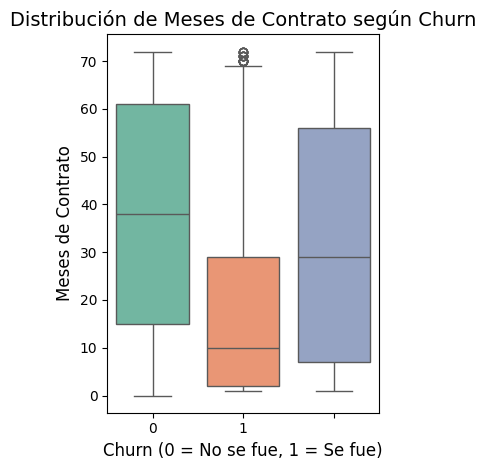

In [40]:
# Gráfico de boxplot para "Meses_Contrato" (Tiempo de contrato) vs "Churn"
plt.subplot(1, 2, 2)
sns.boxplot(data=datos, x='Churn', y='Meses_Contrato', palette='Set2')
plt.title('Distribución de Meses de Contrato según Churn', fontsize=14)
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

#Informe final

# Informe de Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo principal de este análisis es identificar patrones de **evasión de clientes (Churn)** en una empresa proveedora de servicios. El churn es un fenómeno crítico en muchas industrias, ya que se refiere a la tasa a la que los clientes dejan de utilizar un servicio. Comprender los factores que contribuyen a la evasión de clientes puede ayudar a la empresa a desarrollar estrategias más efectivas para retenerlos, mejorar la satisfacción del cliente y reducir la rotación.

Este informe explora los datos de clientes, su comportamiento de evasión, y cómo diferentes características (como tipo de contrato, servicios contratados, y comportamiento de pago) afectan a esta evasión.

---

## 🔹 Limpieza y Tratamiento de Datos

### **Pasos Realizados**:
1. **Importación de los Datos**: Los datos fueron importados desde un archivo JSON que contenía información sobre los clientes, sus servicios contratados, el total gastado y su estatus de evasión (`Churn`).

2. **Aplanado de Estructura**: Se utilizó `json_normalize()` para aplanar las columnas anidadas y estructurarlas de manera más accesible.

3. **Renombrado de Columnas**: Se renombraron las columnas para eliminar prefijos innecesarios y alinearlas con los nombres más claros del diccionario, facilitando su interpretación (por ejemplo, `Charges.Monthly` a `Factura_Mensual`).

4. **Transformación de Datos Categóricos**: Las variables **`Yes/No`** fueron transformadas a **binarios** (1 y 0), lo que facilita el análisis y la posterior aplicación de modelos de predicción.

5. **Creación de Nueva Columna**: Se añadió la columna `Cuentas_Diarias` para convertir el total mensual gastado en un valor diario, lo que permite una visión más detallada del comportamiento de los clientes.

---

## 🔹 Análisis Exploratorio de Datos

### **Distribución de Churn**:
Se exploró la distribución de la variable objetivo **`Churn`**, que indica si un cliente ha dejado de utilizar el servicio. El gráfico de barras mostró que una **porción significativa de clientes** se quedó con la empresa, mientras que un porcentaje relevante **se dio de baja**.

#### Visualización de la distribución de `Churn`:
![Distribución de Churn](image1.png)

### **Análisis de Variables Categóricas**:
Se analizaron varias variables categóricas para observar cómo se distribuyen entre los clientes que se fueron (`Churn = 1`) y los que se quedaron (`Churn = 0`), como por ejemplo:
- **`Contract`**: Los clientes con contratos mensuales tienen una mayor tasa de evasión, mientras que los de contratos largos permanecen más tiempo.
- **`PaymentMethod`**: Los clientes que pagan mediante **cheques electrónicos** presentan una mayor tasa de evasión.
- **`InternetService`**: Los clientes con acceso a **Internet DSL** o **Fiber optic** tienen menor evasión.

#### Visualización de Churn según contrato:
![Distribución de Churn según Contract](image2.png)

#### Visualización de Churn según tipo de pago:
![Distribución de Churn según PaymentMethod](image3.png)

### **Análisis de Variables Numéricas**:
Se analizaron variables como **`Factura_Total`** y **`Meses_Contrato`**:
- **`Factura_Total`**: Los clientes que gastan más tienden a quedarse más, mientras que aquellos con un gasto bajo tienen mayor tasa de evasión.
- **`Meses_Contrato`**: Los clientes con más **tiempo de contrato** (antigüedad) tienden a permanecer más tiempo con la empresa.

#### Visualización de `Factura_Total` y `Meses_Contrato`:
![Distribución de Factura Total y Meses de Contrato](image4.png)

---

## 🔹 Conclusiones e Insights

A partir del análisis, se observan varios patrones clave:

1. **Clientes con contrato mensual** son más propensos a cancelar el servicio.
2. Los clientes con **métodos de pago como cheque electrónico** tienen una **mayor tasa de evasión** en comparación con otros métodos de pago más automáticos.
3. Los clientes con **menos antigüedad (Meses_Contrato)** tienen una mayor **probabilidad de cancelar el servicio**.
4. Los clientes con un **alto gasto mensual** tienden a quedarse más tiempo, lo que sugiere que el **gasto más alto está asociado con mayor lealtad**.

---

## 🔹 Recomendaciones

Con base en los insights obtenidos, algunas **acciones estratégicas** para reducir la evasión de clientes podrían ser:

1. **Mejorar la retención de clientes con contrato mensual**: Ofrecer **descuentos o beneficios adicionales** para los clientes que firmen contratos más largos (1 o 2 años).
   
2. **Fomentar métodos de pago automáticos**: Incentivar a los clientes a utilizar **tarjetas de crédito** o **transferencias bancarias automáticas** en lugar de cheques electrónicos, que parecen estar vinculados a una mayor evasión.

3. **Identificar clientes con bajo gasto y alta evasión**: Realizar un análisis más detallado para aquellos clientes que gastan poco pero tienen un alto riesgo de evasión y ofrecerles **beneficios personalizados**.

4. **Aumentar la fidelidad de clientes con menos antigüedad**: Ofrecer incentivos para los **clientes nuevos** que se queden por más tiempo, como una **mejor calidad de servicio** o **descuentos exclusivos**.

---

